In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from jcopml.plot import plot_confusion_matrix

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [22]:
df = pd.read_csv('dataset_mri.csv')
df = pd.DataFrame(df)
df

,correlation,homogeneity,contrast,ASM,label
0,0.529806,0.522389,7083.791604,0.247180,0
1,0.281862,0.182869,12533.453919,0.021889,0
2,0.485125,0.442897,8391.613983,0.171717,0
3,0.503714,0.490618,7723.844135,0.216780,0
4,0.349184,0.193840,10803.602543,0.019467,0
5,0.165469,0.104409,13844.463968,0.005286,0
6,0.343501,0.280561,11320.584099,0.063546,0
7,0.275219,0.187171,12506.342443,0.020454,0
8,0.514867,0.466321,7583.874569,0.186300,0
9,0.480145,0.462936,8523.569683,0.189454,0


In [23]:
#split dataset to X(data) and y(label)
X = df.drop('label', axis=1)
y = df[['label']]

In [24]:
#split data into data train and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test

,correlation,homogeneity,contrast,ASM
280,0.200524,0.108888,13425.233210,0.003718
434,0.421555,0.408872,9121.190418,0.140073
39,0.244345,0.162371,12792.647104,0.011397
417,0.458882,0.446818,8070.079358,0.162263
585,0.419563,0.311786,9850.152058,0.074819
804,0.612417,0.681220,4471.508386,0.428102
342,0.364313,0.303189,10645.991074,0.070878
669,0.362490,0.314980,10889.412143,0.075359
581,0.235608,0.145612,12924.136169,0.010363
537,0.491173,0.514009,7463.524907,0.232445


In [25]:
#classification model
y_training = y_train.values.ravel()
model_rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=4)
model_rf.fit(X_train, y_training)



RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [26]:
#trees in forest counts
len(model_rf.estimators_)

200

In [37]:
estimator = model_rf.estimators_[0]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'Normal'
y_train_str[y_train_str == '1'] = 'Tumor'
y_train_str = y_train_str.values
y_train_str

array([['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],
       ['Tumor'],
       ['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Normal'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],
       ['Normal'],
       ['Tumor'],
       ['Tumor'],


KeyError: 1

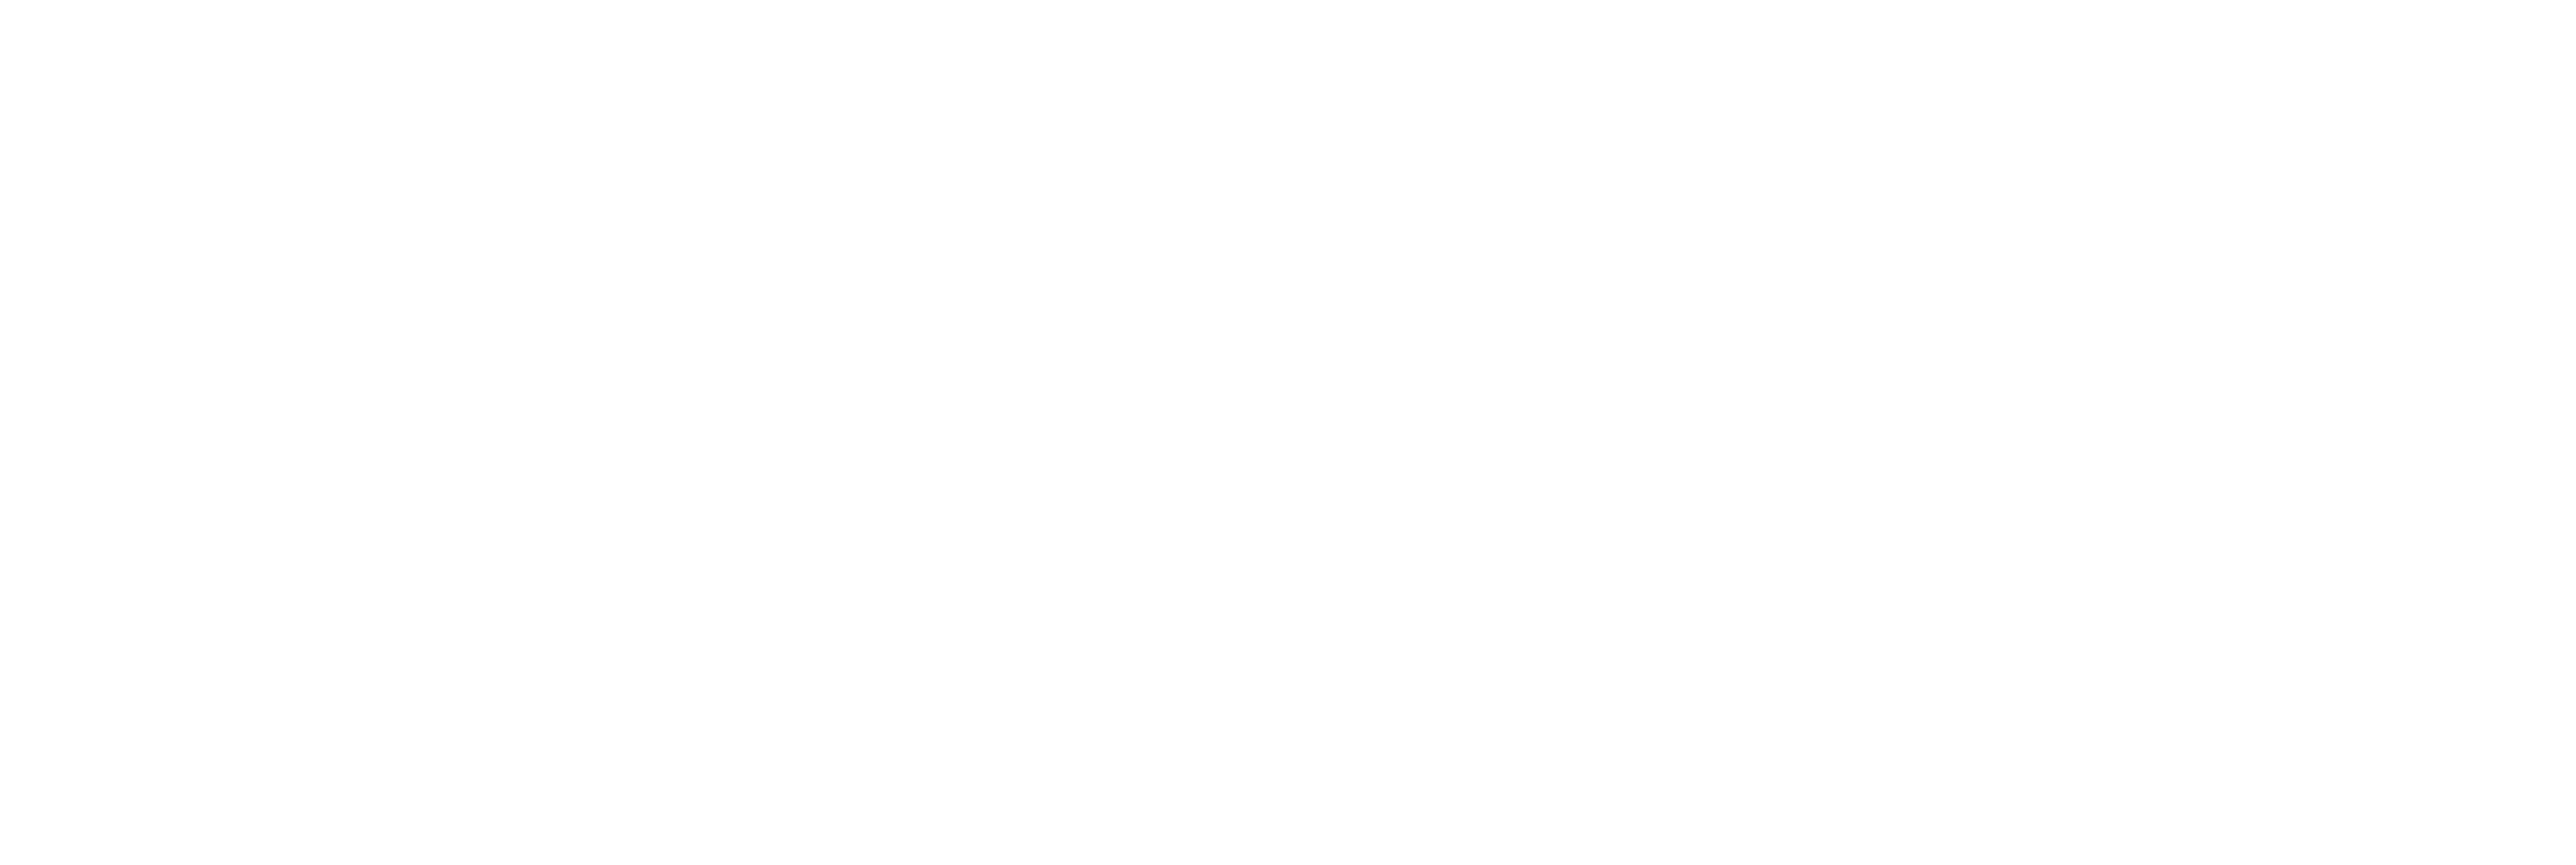

In [36]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3.7,1.1), dpi=1000)
tree.plot_tree(model_rf.estimators_[0],
               feature_names = feature_names, 
               class_names=y_train_str,
               filled = True);

In [29]:
rf_result = model_rf.predict(X_test)
akurasi_rf = accuracy_score(y_test.values.ravel(), rf_result)*100
presisi_rf = precision_score(y_test.values.ravel(), rf_result)*100
recall_rf = recall_score(y_test.values.ravel(), rf_result)*100
print('n_estimator = {} Akurasi = {:.2f} Presisi = {:.2f} Recall = {:.2f}'. format(35, akurasi_rf, presisi_rf, recall_rf))

n_estimator = 35 Akurasi = 86.57 Presisi = 86.60 Recall = 93.97


In [8]:
rfc_cv_score = cross_val_score(model_rf, X, y.values.ravel(), cv=10, scoring='roc_auc')
print(rfc_cv_score)

[0.82585106 0.91010638 0.86553191 0.8712766  0.86978723 0.86691489
 0.85478723 0.98010753 0.99096774 0.89182796]


In [9]:
print("=== Confusion Matrix ===")
cf_matrix = confusion_matrix(y_test, rf_result, labels=[1,0])
print(cf_matrix)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_result))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[266  16]
 [ 41 109]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       150
           1       0.87      0.94      0.90       282

    accuracy                           0.87       432
   macro avg       0.87      0.83      0.85       432
weighted avg       0.87      0.87      0.86       432



=== All AUC Scores ===
[0.82585106 0.91010638 0.86553191 0.8712766  0.86978723 0.86691489
 0.85478723 0.98010753 0.99096774 0.89182796]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8927158544955388


In [ ]:
#plot confusion matrix
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print('Test Loop Accuracy in forest = ') 
print('---------------------------------------') 
for i in range(1,16): 
    rf = RandomForestClassifier(n_estimators=i, random_state = 42) 
    rf.fit(X_train, y_train.values.ravel()) 
    print(" - > TEST set score : " +str(i)+" estimators:{:.5}".format(rf.score(X_test, y_test))) 
print('---------------------------------------')

In [ ]:
model_rf.estimators_

In [ ]:
print(len(model_rf.estimators_))

In [ ]:
model_rf.estimators_[0]

In [ ]:
features = X.values.to_list()
target = y.values.to_list()

In [ ]:
fn=df.X
cn=df.y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')